In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ConsPensionModel import PensionConsumerType
from IPython import get_ipython
from utilities import plot_3d_func, plot_scatter_hist

figures_path = "../../content/figures/"

c:\Users\alujan\miniconda3\envs\egmn-dev\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
agent = PensionConsumerType(cycles=5)

In [3]:
agent.solve()

T = 0

## Post Decision Stage

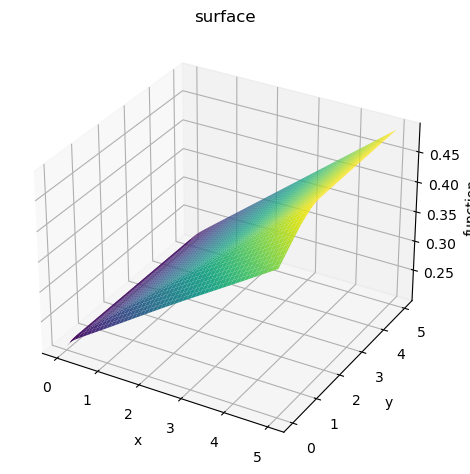

In [4]:
plot_3d_func(agent.solution[T].post_decision_stage.v_func.vFuncNvrs, [0, 5], [0, 5])

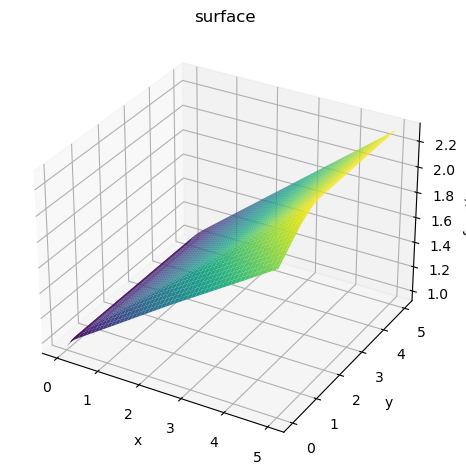

In [5]:
plot_3d_func(agent.solution[T].post_decision_stage.dvda_func.cFunc, [0, 5], [0, 5])

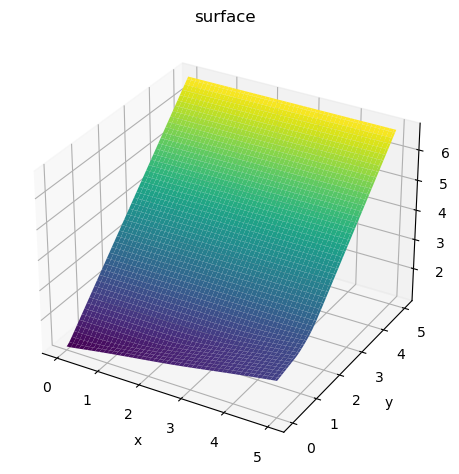

In [6]:
plot_3d_func(agent.solution[T].post_decision_stage.dvdb_func.cFunc, [0, 5], [0, 5])

## Consumption Stage

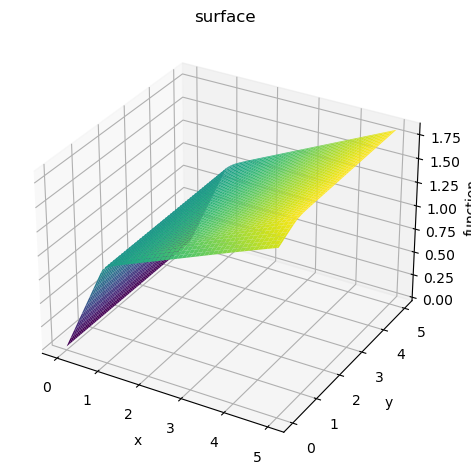

In [7]:
plot_3d_func(agent.solution[T].consumption_stage.c_func, [0, 5], [0, 5])

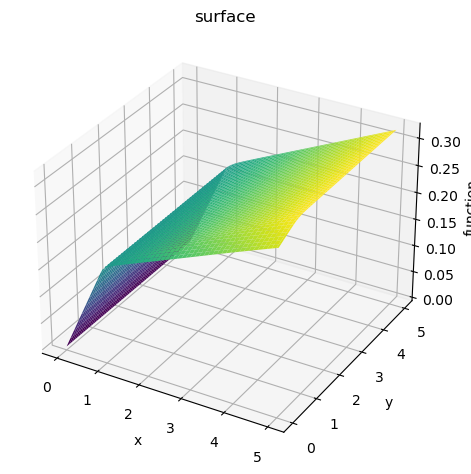

In [8]:
plot_3d_func(agent.solution[T].consumption_stage.v_func.vFuncNvrs, [0, 5], [0, 5])

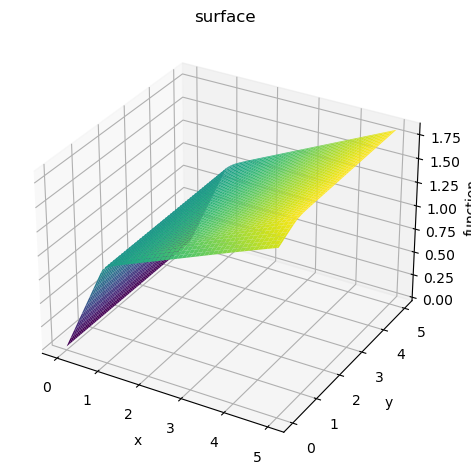

In [9]:
plot_3d_func(agent.solution[T].consumption_stage.dvdl_func.cFunc, [0, 5], [0, 5])

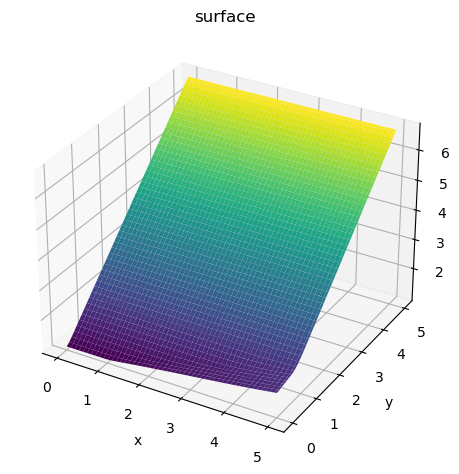

In [10]:
plot_3d_func(agent.solution[T].consumption_stage.dvdb_func.cFunc, [0, 5], [0, 5])

## Deposit Stage

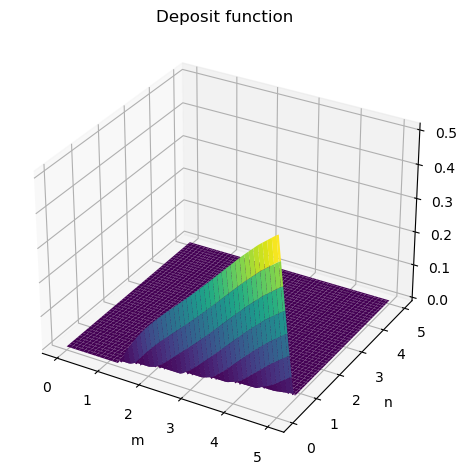

<Figure size 640x480 with 0 Axes>

In [22]:
plot_3d_func(agent.solution[T].deposit_stage.d_func, [0, 5], [0, 5], 
             meta={"title": "Deposit function", "xlabel": "m", "ylabel": "n", "zlabel": "d"},
             savename="PensionDepositFunction")

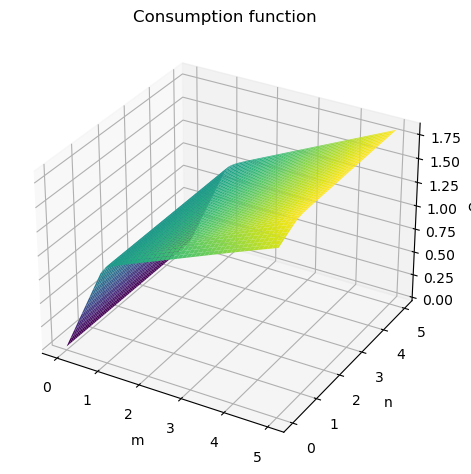

<Figure size 640x480 with 0 Axes>

In [23]:
plot_3d_func(agent.solution[T].deposit_stage.c_func, [0, 5], [0, 5], 
             meta={"title": "Consumption function", "xlabel": "m", "ylabel": "n", "zlabel": "d"},
             savename="PensionConsumptionFunction")

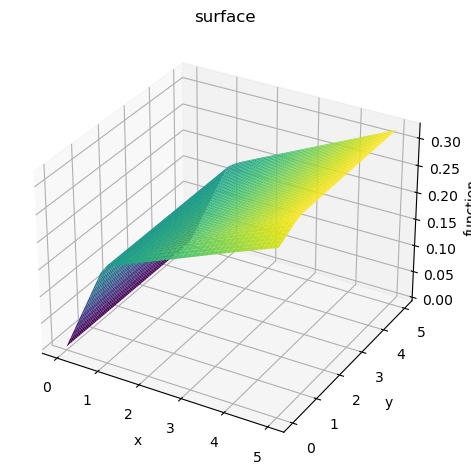

In [13]:
plot_3d_func(agent.solution[T].deposit_stage.v_func.vFuncNvrs, [0, 5], [0, 5])

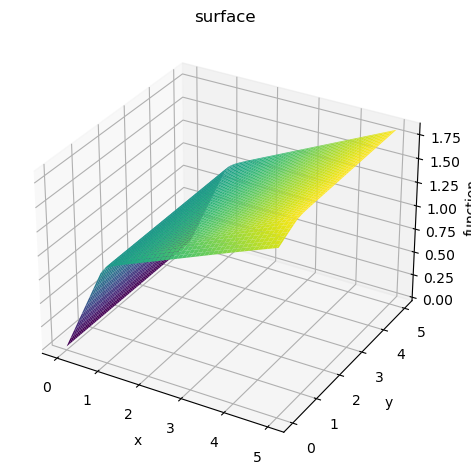

In [14]:
plot_3d_func(agent.solution[T].deposit_stage.dvdm_func.cFunc, [0, 5], [0, 5])

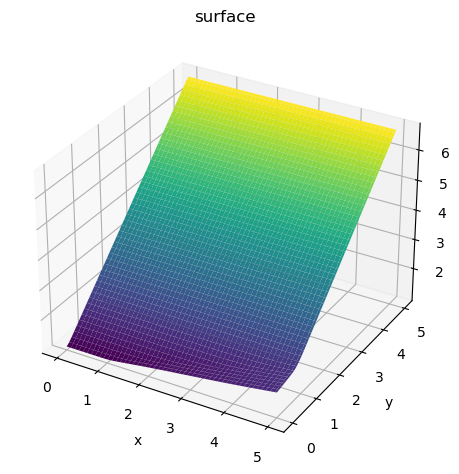

In [15]:
plot_3d_func(agent.solution[T].deposit_stage.dvdn_func.cFunc, [0, 5], [0, 5])

CPU times: total: 0 ns
Wall time: 0 ns


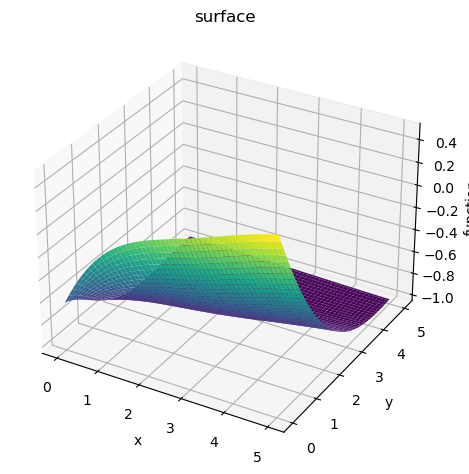

In [16]:
%time
plot_3d_func(agent.solution[T].deposit_stage.gaussian_interp, [0, 5], [0, 5])

## Grids

In [17]:
grids = agent.solution[T].consumption_stage.grids_before_cleanup

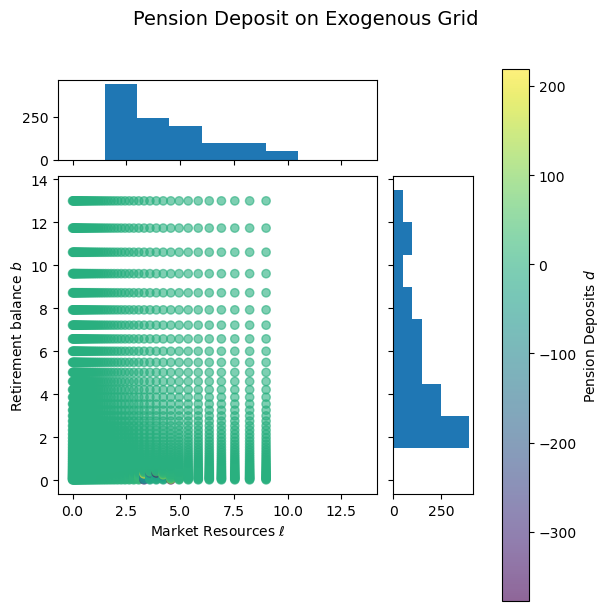

In [18]:
plot_scatter_hist(
    grids["lMat"],
    grids["blMat"],
    grids["dMat"],
    "Pension Deposit on Exogenous Grid",
    r"Market Resources $\ell$",
    "Retirement balance $b$",
    "PensionFullExogenousGrid",
)

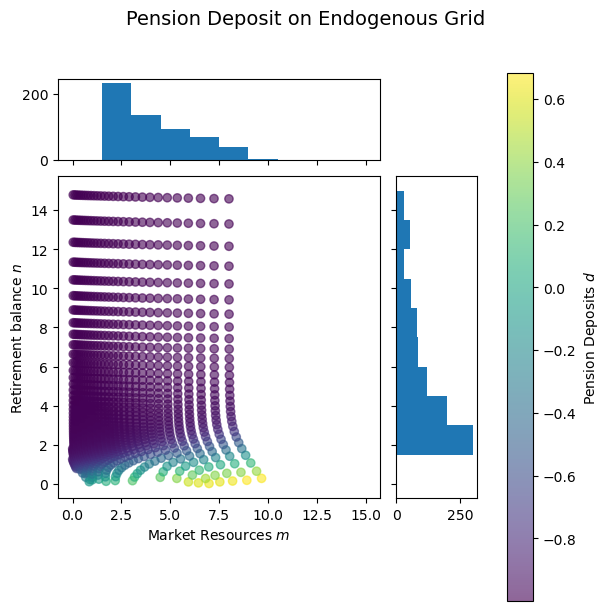

In [19]:
plot_scatter_hist(
    grids["mMat"],
    grids["nMat"],
    grids["dMat"],
    "Pension Deposit on Endogenous Grid",
    "Market Resources $m$",
    "Retirement balance $n$",
    "PensionFullEndogenousGrid",
)

In [20]:
grids = agent.solution[T].consumption_stage.grids_before_cleanup

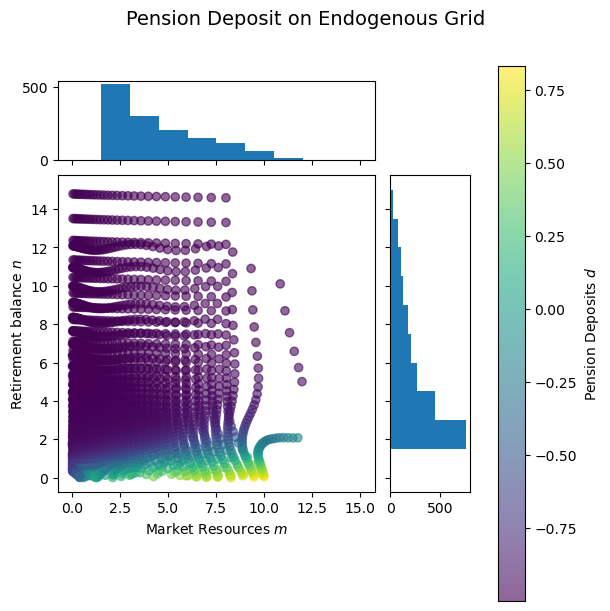

In [21]:
plot_scatter_hist(
    agent.solution[T].deposit_stage.gaussian_interp.grids[0],
    agent.solution[T].deposit_stage.gaussian_interp.grids[1],
    agent.solution[T].deposit_stage.gaussian_interp.values,
    "Pension Deposit on Endogenous Grid",
    "Market Resources $m$",
    "Retirement balance $n$",
    "2ndStagePensionFullEndogenousGrid",
)